In [322]:
import pandas as pd
import numpy as np

In [323]:
import matplotlib.pyplot as plt

In [324]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

In [325]:
x, y = make_classification(n_samples=500, n_features=2, n_informative=1,n_redundant=0,n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=20)

In [326]:
x

array([[-1.79336584e-01, -2.99926776e+00],
       [-5.02490809e-01, -3.83674250e+00],
       [-1.34184156e+00, -3.27409589e+00],
       [ 7.76487098e-01, -2.42482962e+00],
       [-1.15481280e+00, -4.32071185e+00],
       [ 9.05848073e-01,  1.00056257e+00],
       [-7.30893314e-01,  2.25630949e-01],
       [ 6.93695961e-01,  2.84260889e-01],
       [ 1.87127396e-01, -2.43040975e+00],
       [ 7.55986471e-01,  7.50868738e-01],
       [ 2.54074501e+00, -2.98071872e+00],
       [-3.10319263e-02,  7.81006896e-01],
       [ 1.13419830e+00, -3.14283219e+00],
       [ 9.58869959e-01,  1.25069984e+00],
       [-1.54492348e-01, -2.67567943e+00],
       [ 7.58593765e-01,  1.52465396e+00],
       [ 1.65702064e-01, -3.78538732e+00],
       [ 1.38520783e+00,  1.11586680e+00],
       [ 1.75302572e+00,  9.39485872e-01],
       [ 4.08223759e-01,  6.66200983e-01],
       [ 2.48790345e-01,  1.48252417e+00],
       [-4.62585362e-01,  1.12229883e+00],
       [ 2.71055414e-02, -3.73483118e+00],
       [ 1.

In [327]:
y

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,

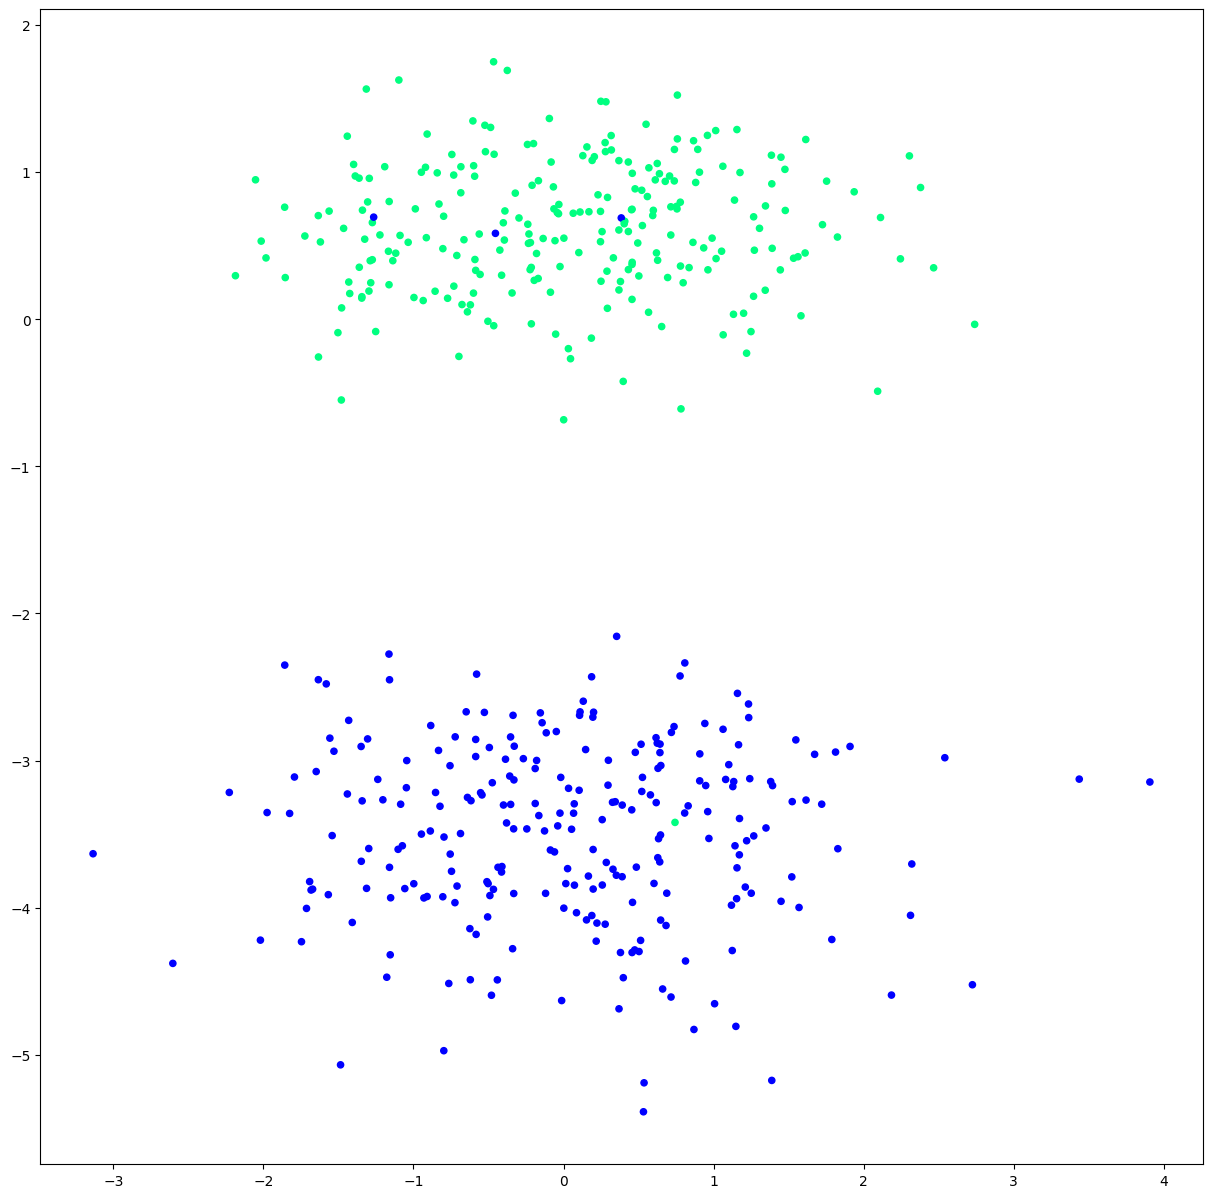

In [328]:
plt.figure(figsize=(15,15))
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=20)

In [329]:
model = LogisticRegression(solver='sag')
model.fit(x,y)

LogisticRegression(solver='sag')

In [330]:
model.intercept_

array([3.0897553])

In [331]:
model.coef_

array([[0.26672406, 2.45579287]])

In [332]:
m1 = -(model.coef_[0][0]/model.coef_[0][1])
b1 = -(model.intercept_/model.coef_[0][1])

In [333]:
x_input = np.linspace(-3,3,500)
y_input = m1*x_input + b1

In [334]:

def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [335]:
def grad_des(x,y):
    
    x = np.insert(x,0,1,axis=1)
    weights = np.ones(x.shape[1])
    lr = 0.5
    
    for i in range(500000):
        y_hat = sigmoid(np.dot(x,weights))
        weights = weights + lr*(np.dot((y-y_hat),x)/x.shape[0])
        
    return weights[1:],weights[0]

In [318]:
coef_,intercept_ = grad_des(x,y)

In [319]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [320]:
x_input1 = np.linspace(-3,3,500)
y_input1 = m*x_input1 + b

(-8.0, 3.0)

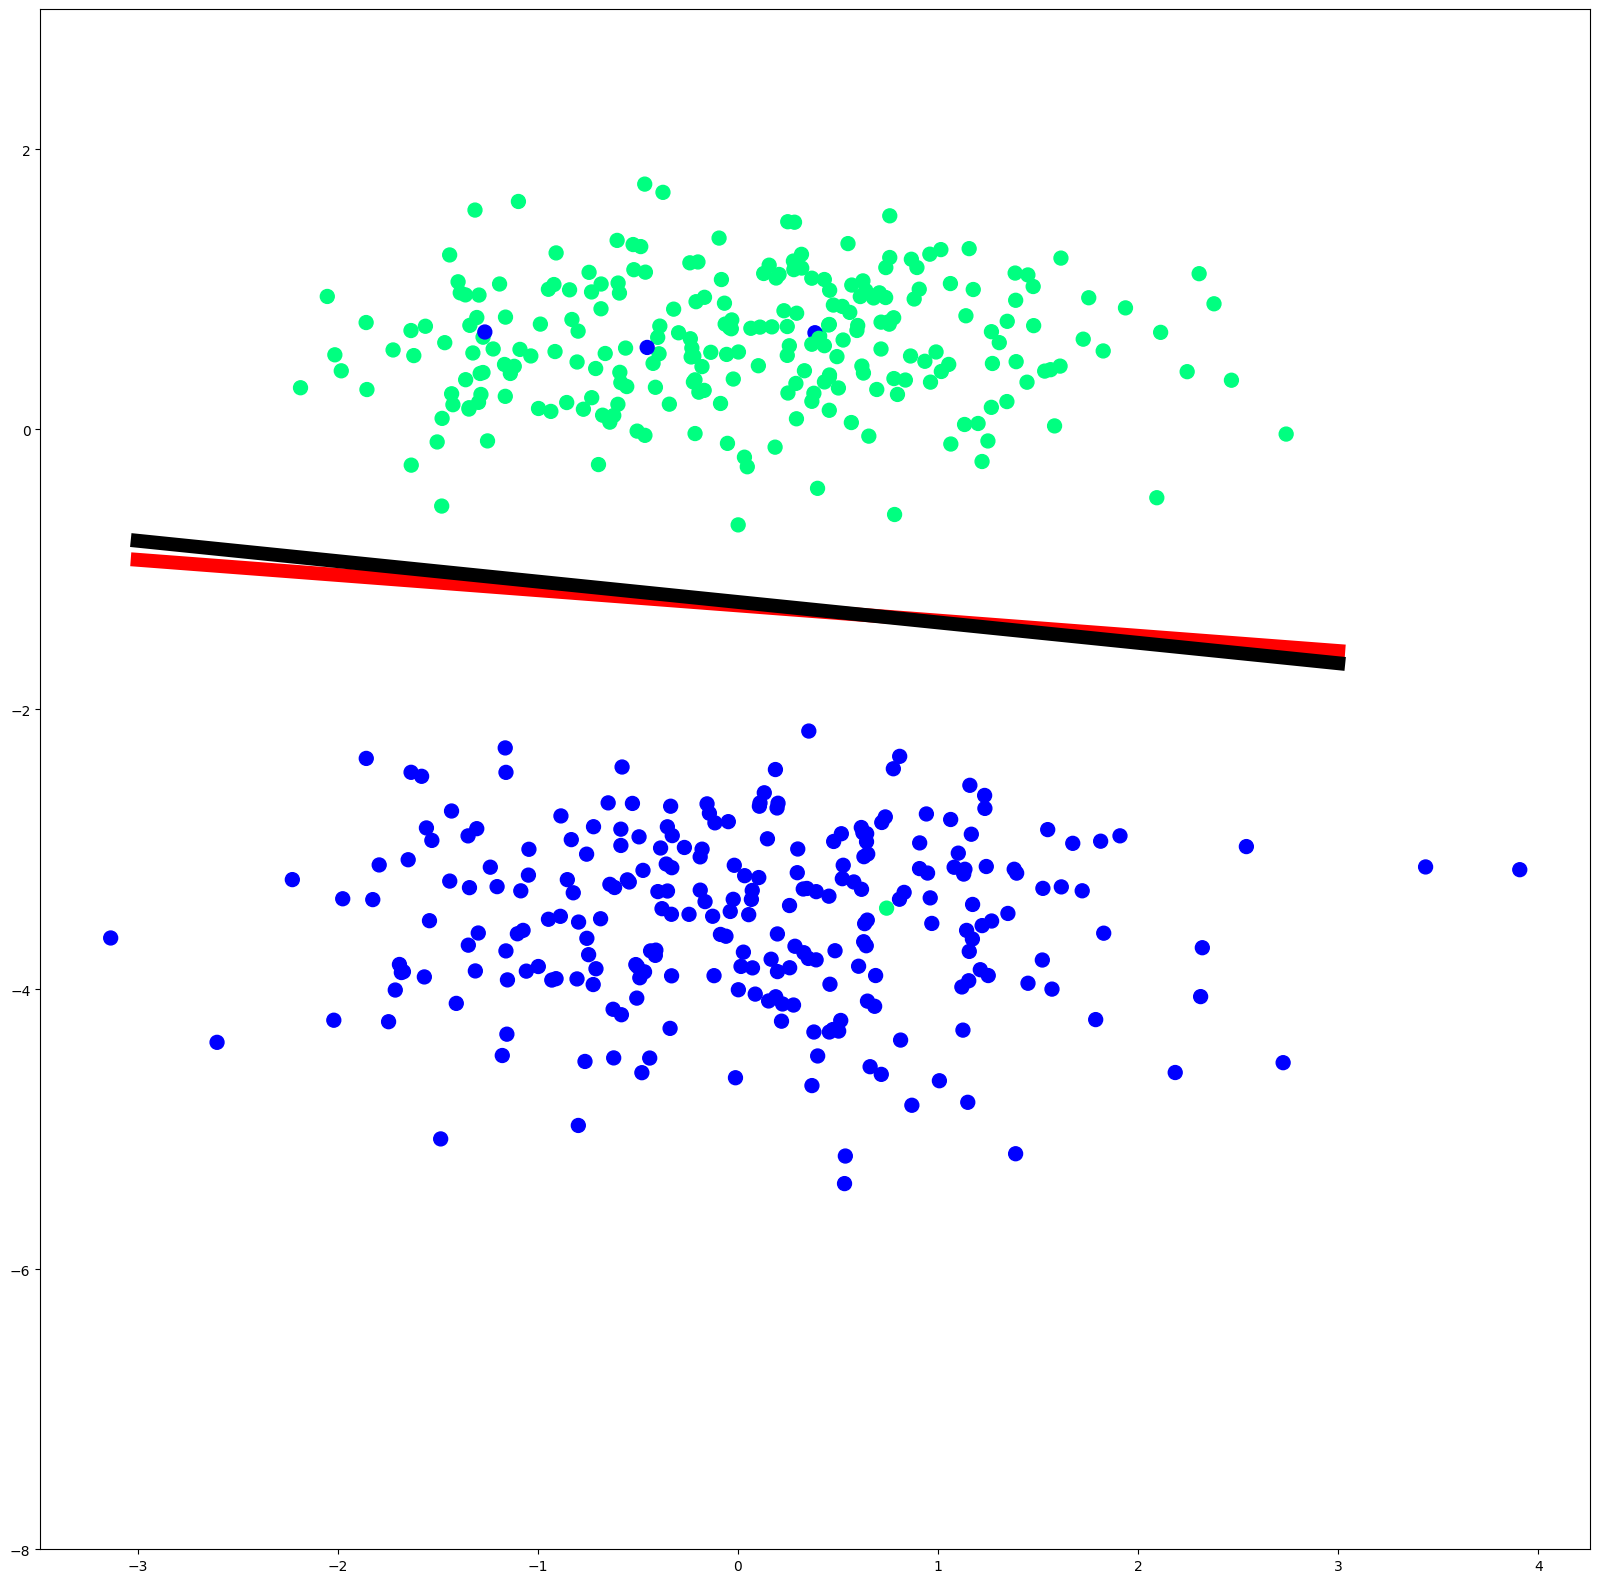

In [321]:
plt.figure(figsize=(20,20))
plt.plot(x_input,y_input,color='red',linewidth=10)
plt.plot(x_input1,y_input1,color='black',linewidth=10)
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)
plt.ylim(-8,3)